<a href="https://colab.research.google.com/github/DanielHCHaiduk/premier_n1/blob/main/Prova_Data_Science_N1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

# New Section

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [8]:
!pip install pandas matplotlib seaborn dash plotly pandas numpy

## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [13]:
# Importando a biblioteca pandas para manipulação de dados
import pandas as pd

# Carregando o arquivo CSV
df = pd.read_csv('/matches.csv')

# Exibindo o número de linhas e colunas (shape) do dataset
print(f"Dimensões do dataset: {df.shape[0]} linhas e {df.shape[1]} colunas")

# Exibindo os tipos de dados de cada coluna
print("\nTipos de dados por coluna:")
print(df.dtypes)

# Verificando quantos valores ausentes existem em cada coluna
print("\nValores ausentes por coluna:")
print(df.isna().sum())

# Exibindo as estatísticas descritivas das colunas numéricas
print("\nResumo estatístico das colunas numéricas:")
print(df.describe())


Dimensões do dataset: 1389 linhas e 28 colunas

Tipos de dados por coluna:
Unnamed: 0        int64
date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

Valores ausentes por coluna:
Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0

## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

<ipython-input-16-6b8ad926dd16>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_pt', y='num_jogos', data=numero_jogos_por_dia, ax=ax[1], palette='Blues_d')


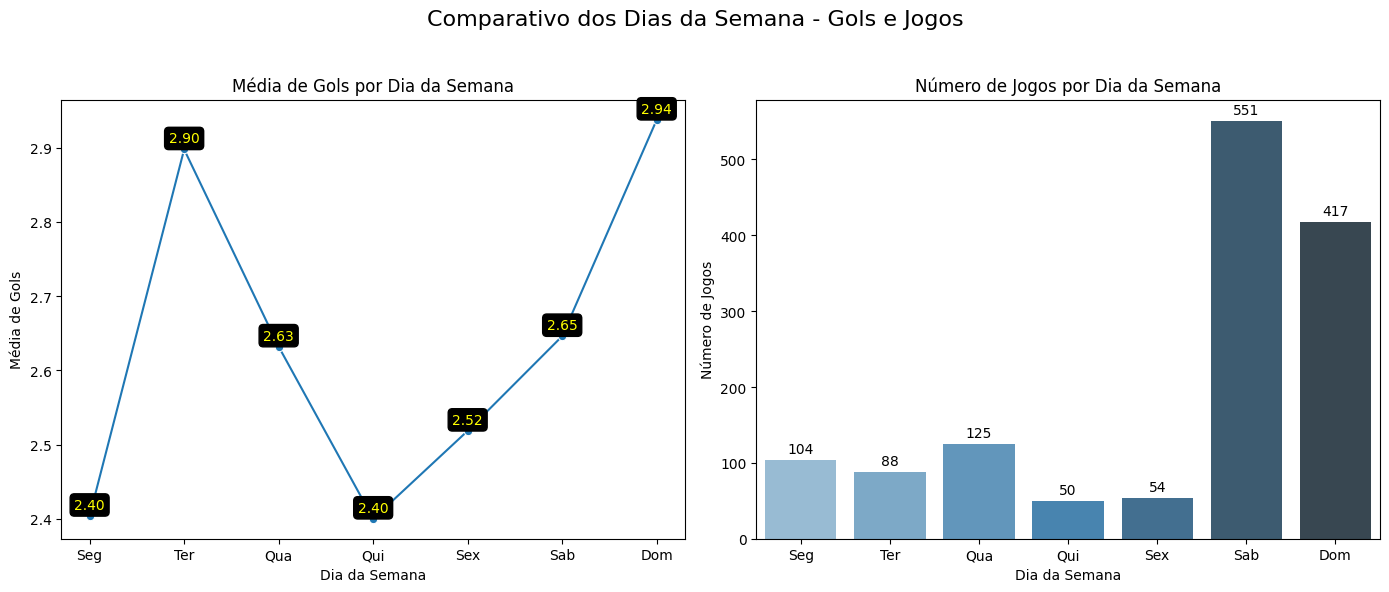

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
df = pd.read_csv('/matches.csv')

# Criando uma nova coluna que soma os gols feitos e sofridos
df['total_goals'] = df['gf'] + df['ga']

# Traduzindo os dias da semana para português
dias_semana = {
    'Mon': 'Seg', 'Tue': 'Ter', 'Wed': 'Qua', 'Thu': 'Qui',
    'Fri': 'Sex', 'Sat': 'Sab', 'Sun': 'Dom'
}
df['day_pt'] = df['day'].map(dias_semana)

# Média de gols por dia da semana
media_gols_por_dia = df.groupby('day_pt')['total_goals'].mean().reset_index()

# Ordenando os dias da semana corretamente
dias_ordenados = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']
media_gols_por_dia['day_pt'] = pd.Categorical(media_gols_por_dia['day_pt'], categories=dias_ordenados, ordered=True)
media_gols_por_dia = media_gols_por_dia.sort_values('day_pt')

# Criando os gráficos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Comparativo dos Dias da Semana - Gols e Jogos', fontsize=16)

# Gráfico 1: Média de Gols por Dia da Semana
sns.lineplot(x='day_pt', y='total_goals', data=media_gols_por_dia, marker='o', ax=ax[0])
ax[0].set_title('Média de Gols por Dia da Semana')
ax[0].set_xlabel('Dia da Semana')
ax[0].set_ylabel('Média de Gols')

# Adicionando anotações nos pontos
for x, y in zip(media_gols_por_dia['day_pt'], media_gols_por_dia['total_goals']):
    ax[0].annotate(f'{y:.2f}', xy=(x, y), textcoords='offset points', xytext=(0, 5), ha='center', fontsize=10, color='yellow', bbox=dict(facecolor='black', edgecolor='black', boxstyle='round,pad=0.3'))

# Gráfico 2: Número de Jogos por Dia da Semana
numero_jogos_por_dia = df['day_pt'].value_counts().reindex(dias_ordenados).reset_index()
numero_jogos_por_dia.columns = ['day_pt', 'num_jogos']
sns.barplot(x='day_pt', y='num_jogos', data=numero_jogos_por_dia, ax=ax[1], palette='Blues_d')
ax[1].set_title('Número de Jogos por Dia da Semana')
ax[1].set_xlabel('Dia da Semana')
ax[1].set_ylabel('Número de Jogos')

# Adicionando anotações nas barras
for bar in ax[1].patches:
    ax[1].annotate(f'{int(bar.get_height())}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   textcoords='offset points', xytext=(0, 5), ha='center', fontsize=10, color='black')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

<ipython-input-17-f41c6c7fb3e9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Equipe', y='Numero_de_Capitaes', data=capitaes_por_equipe, palette='viridis')


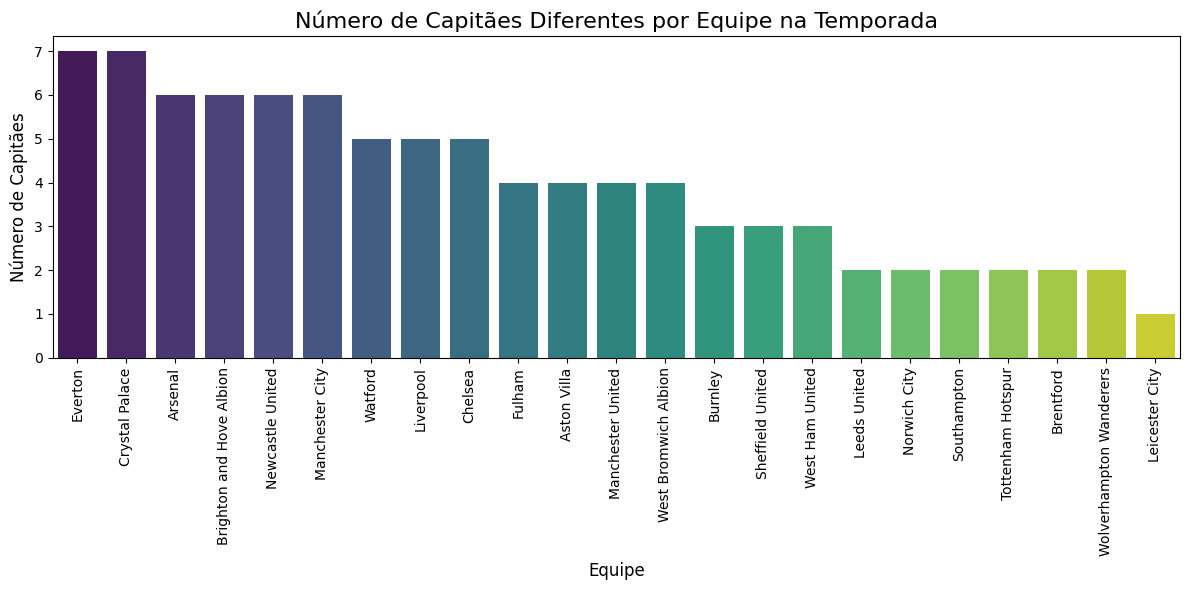

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
df = pd.read_csv('/matches.csv')

# Contar o número de capitães únicos por equipe
capitaes_por_equipe = df.groupby('team')['captain'].nunique().reset_index()
capitaes_por_equipe.columns = ['Equipe', 'Numero_de_Capitaes']

# Ordenando as equipes pelo número de capitães (opcional, para melhorar visualização)
capitaes_por_equipe = capitaes_por_equipe.sort_values('Numero_de_Capitaes', ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Equipe', y='Numero_de_Capitaes', data=capitaes_por_equipe, palette='viridis')

# Ajustes de título e rótulos
plt.title('Número de Capitães Diferentes por Equipe na Temporada', fontsize=16)
plt.xlabel('Equipe', fontsize=12)
plt.ylabel('Número de Capitães', fontsize=12)
plt.xticks(rotation=90)  # Rotacionar os nomes das equipes para melhor leitura

# Exibir o gráfico
plt.tight_layout()
plt.show()


## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

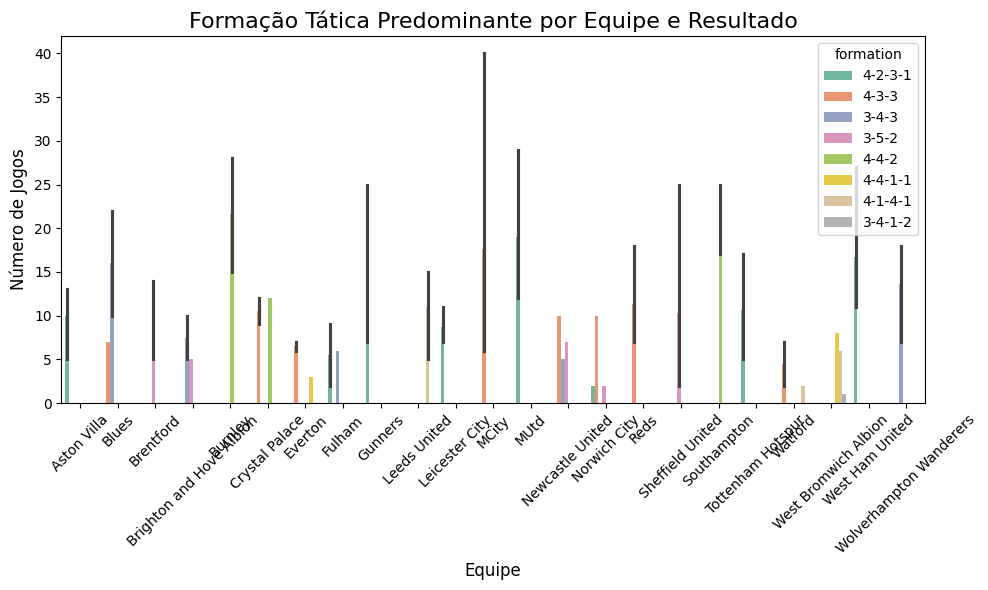

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
df = pd.read_csv('/matches.csv')

# Substituir os nomes das equipes por apelidos diferentes
df['team'] = df['team'].replace({
    'Manchester City': 'Citizens',
    'Manchester United': 'Red Devils',
    'Chelsea': 'Blues',
    'Liverpool': 'Reds',
    'Arsenal': 'Gunners'
})

# Substituir os resultados por traduções claras
df['result'] = df['result'].replace({
    'W': 'Vitória',
    'D': 'Empate',
    'L': 'Derrota'
})

# Contar a formação mais comum por equipe e resultado
contagem_formacao = df.groupby(['team', 'result', 'formation']).size().reset_index(name='contagem')

# Filtrar para pegar a formação mais comum por equipe e resultado
formacao_mais_comum = contagem_formacao.loc[contagem_formacao.groupby(['team', 'result'])['contagem'].idxmax()]

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='contagem', hue='formation', data=formacao_mais_comum, palette='muted')

# Ajustes de título e rótulos
plt.title('Formação Tática Mais Comum por Equipe e Resultado', fontsize=16)
plt.xlabel('Equipe', fontsize=12)
plt.ylabel('Número de Jogos', fontsize=12)
plt.xticks(rotation=45)

# Adicionar legenda clara e bem posicionada
plt.legend(title='Formação', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.tight_layout()
plt.show()


## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

<ipython-input-20-d0a76144f2df>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y='poss', data=media_posse_por_time, palette='coolwarm')


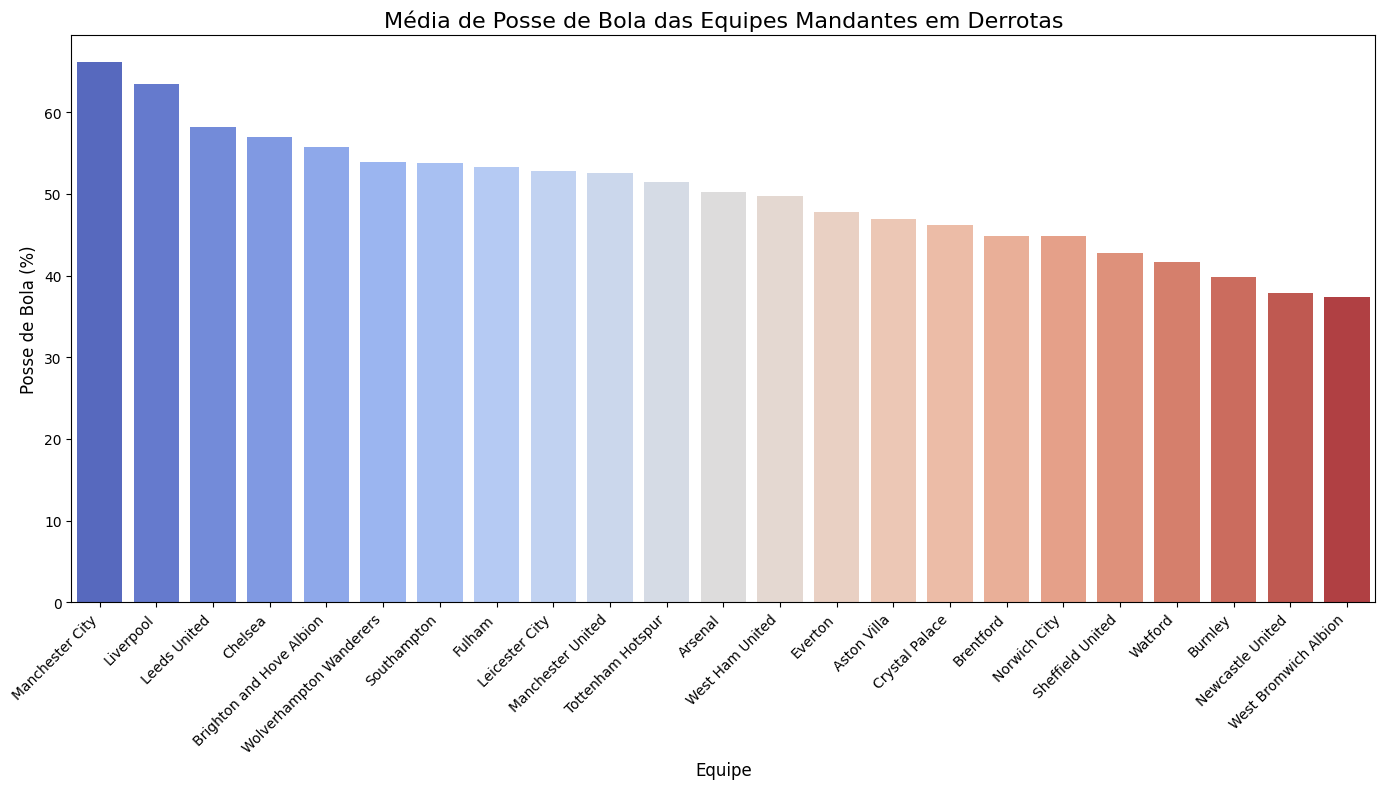

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
df = pd.read_csv('/matches.csv')

# Substituir os resultados para facilitar a leitura
df['result'] = df['result'].replace({'L': 'Derrota', 'W': 'Vitória', 'D': 'Empate'})

# Filtrar jogos em casa que foram perdidos
derrotas_mandante = df[(df['venue'] == 'Home') & (df['result'] == 'Derrota')]

# Calcular a média de posse de bola das equipes mandantes em derrotas
media_posse_por_time = derrotas_mandante.groupby('team')['poss'].mean().reset_index()

# Ordenar por posse de bola para facilitar a visualização
media_posse_por_time = media_posse_por_time.sort_values(by='poss', ascending=False)

# Ajustar o tamanho da figura
plt.figure(figsize=(14, 8))

# Criar o gráfico de barras
sns.barplot(x='team', y='poss', data=media_posse_por_time, palette='coolwarm')

# Ajustes de título e rótulos
plt.title('Média de Posse de Bola das Equipes Mandantes em Derrotas', fontsize=16)
plt.xlabel('Equipe', fontsize=12)
plt.ylabel('Posse de Bola (%)', fontsize=12)

# Ajustar a rotação dos rótulos e o tamanho da fonte
plt.xticks(rotation=45, ha='right', fontsize=10)

# Exibir o gráfico
plt.tight_layout()
plt.show()



## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [27]:
import pandas as pd
from IPython.display import display

# Carregar o arquivo CSV
df = pd.read_csv('/matches.csv')

# Calcular os pontos para cada resultado: 3 pontos por vitória, 1 por empate, 0 por derrota
df['points'] = df['result'].apply(lambda x: 3 if x == 'W' else 1 if x == 'D' else 0)

# Agrupar por equipe e somar os pontos
team_points = df.groupby('team')['points'].sum().reset_index()

# Ordenar as equipes pela quantidade de pontos de forma decrescente
team_points = team_points.sort_values(by='points', ascending=False).reset_index(drop=True)

# Adicionar uma coluna de posição (classificação)
team_points['position'] = team_points.index + 1

# Dicionário com URLs dos logos dos times
team_logos = {
    'Arsenal': 'https://logodetimes.com/times/arsenal-football-club/arsenal-football-club-256.png',
    'Aston Villa': 'https://logodetimes.com/times/aston-villa-football-club/aston-villa-football-club-256.png',
    'Brentford': 'https://logodetimes.com/times/brentford-football-club/brentford-football-club-256.png',
    'Brighton': 'https://logodetimes.com/times/brighton-hove-albion-football-club/brighton-hove-albion-football-club-256.png',
    'Burnley': 'https://logodetimes.com/times/burnley-football-club/burnley-football-club-256.png',
    'Chelsea': 'https://logodetimes.com/times/chelsea-football-club/chelsea-football-club-256.png',
    'Crystal Palace': 'https://logodetimes.com/times/crystal-palace-football-club/crystal-palace-football-club-256.png',
    'Everton': 'https://logodetimes.com/times/everton-football-club/everton-football-club-256.png',
    'Leeds United': 'https://logodetimes.com/times/leeds-united-football-club/leeds-united-football-club-256.png',
    'Leicester City': 'https://logodetimes.com/times/leicester-city-football-club/leicester-city-football-club-256.png',
    'Liverpool': 'https://logodetimes.com/times/liverpool-football-club/liverpool-football-club-256.png',
    'Manchester City': 'https://logodetimes.com/times/manchester-city-football-club/manchester-city-football-club-256.png',
    'Manchester United': 'https://logodetimes.com/times/manchester-united-football-club/manchester-united-football-club-256.png',
    'Newcastle United': 'https://logodetimes.com/times/newcastle-united-football-club/newcastle-united-football-club-256.png',
    'Norwich City': 'https://logodetimes.com/times/norwich-city-football-club/norwich-city-football-club-256.png',
    'Southampton': 'https://logodetimes.com/times/southampton-football-club/southampton-football-club-256.png',
    'Tottenham': 'https://logodetimes.com/times/tottenham-hotspur-football-club/tottenham-hotspur-football-club-256.png',
    'Watford': 'https://logodetimes.com/times/watford-football-club/watford-football-club-256.png',
    'West Ham': 'https://logodetimes.com/times/west-ham-united-football-club/west-ham-united-football-club-256.png',
    'Wolverhampton': 'https://logodetimes.com/times/wolverhampton-wanderers-football-club/wolverhampton-wanderers-football-club-256.png'
}

# URL padrão para times sem logo
default_logo = 'https://logodetimes.com/wp-content/uploads/logo-placeholder.png'

# Função para pegar o logo de cada time
def get_team_logo(team_name):
    return f'<img src="{team_logos.get(team_name, default_logo)}" width="50" height="50">'

# Adicionar a coluna de logos ao DataFrame
team_points['logo'] = team_points['team'].apply(get_team_logo)

# Função para destacar o campeão
def highlight_top_team(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

# Função para filtrar times ou posições, se necessário
def filter_teams(team_filter=None, position_filter=None):
    filtered_df = team_points.copy()

    # Filtro por nome de equipe
    if team_filter:
        filtered_df = filtered_df[filtered_df['team'].str.contains(team_filter, case=False)]

    # Filtro por posição
    if position_filter:
        filtered_df = filtered_df[filtered_df['position'] == position_filter]

    # Exibir apenas as colunas relevantes
    filtered_df = filtered_df[['logo', 'team', 'points', 'position']]

    # Estilizar a tabela
    styled_table = filtered_df.style.apply(highlight_top_team, subset=['points']).set_table_attributes('class="dataframe"')\
                                     .set_properties(**{'border': '1px solid black', 'text-align': 'center'})

    return styled_table

# Exibir a tabela completa
display(filter_teams())


,logo,team,points,position
0,,Manchester City,166,1
1,,Chelsea,132,2
2,,Manchester United,128,3
3,,Arsenal,121,4
4,,Tottenham Hotspur,120,5
5,,West Ham United,117,6
6,,Leicester City,108,7
7,,Wolverhampton Wanderers,94,8
8,,Leeds United,93,9
9,,Aston Villa,92,10


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

In [30]:
import pandas as pd
import plotly.express as px

# Carregar o arquivo CSV
df = pd.read_csv('/matches.csv')

# Filtrar apenas os jogos que possuem dados de público
df_publ = df.dropna(subset=['attendance'])

# Agrupar para obter o público total por equipe
publico_total_por_equipe = df_publ.groupby('team')['attendance'].sum().reset_index()

# Criar gráfico de barras para o público total por equipe
fig = px.bar(publico_total_por_equipe, x='team', y='attendance',
             title="Público Total por Equipe",
             labels={'attendance': 'Público Total', 'team': 'Equipe'},
             hover_data={'attendance': ':.0f'})

# Detalhamento por jogos (DrillDown)
def detalhar_publico_por_jogo(equipe):
    df_jogos = df_publ[df_publ['team'] == equipe]
    fig_jogos = px.bar(df_jogos, x='date', y='attendance',
                       title=f"Público dos Jogos da Equipe {equipe}",
                       labels={'attendance': 'Público', 'date': 'Data'},
                       hover_data={'attendance': ':.0f'})
    fig_jogos.show()

# Exibir o gráfico principal (chamando a função de detalhamento ao clicar em um time)
fig.update_traces(marker_color='lightblue')

# Adicionar interação (DrillDown)
def click_data(trace, points, state):
    equipe_selecionada = publico_total_por_equipe.iloc[points.point_inds[0]]['team']
    detalhar_publico_por_jogo(equipe_selecionada)

fig.data[0].on_click(click_data)

# Exibir o gráfico principal
fig.show()

